Daniel Arnaiz Gutierrez<br>
Miguel Perez de Echazarreta

In [0]:
!git clone https://github.com/daniarnaizg/text-detector-ocr.git

In [0]:
from IPython.display import clear_output

In [9]:
!ls text-detector-ocr/Resources/datasets

cifar10-png.zip  MSRA-TD500.zip


In [0]:
# Get MSRA-TD500 dataset
!unzip text-detector-ocr/Resources/datasets/MSRA-TD500.zip
clear_output()

In [11]:
!mkdir data

'''
Move all the files to the folder and conver GT files to TXT
'''

from os import listdir, rename
from os.path import isfile, join
import shutil

train_path = "MSRA-TD500/train"

files = [f for f in listdir(train_path) if isfile(join(train_path, f))]

data_path = "data"

for file in files:
  number,ext = file.split(".")
  full_path = join(train_path, file)
  
  if ext=="gt":
    new_path = join(data_path, file)
    shutil.copy(full_path, new_path)
    rename(new_path, new_path[:-2] + 'TXT')

  else:
    new_path = join(data_path, file)
    shutil.copy(full_path, join(data_path, file))

mkdir: cannot create directory ‘data’: File exists


In [12]:
# Contenido de un archivo txt
!cat data/IMG_0030.TXT

In [0]:
from skimage import io as sio
import numpy as np
from os import listdir
from os.path import join

'''
Load the images usin sklearn
'''

def getData(data_path):
  
  X = []
  Y = []
  
  data = [join(data_path, f[:-4]) for f in listdir(data_path)]
  
  for i in data:
    X.append(sio.imread(i+'.JPG'))
    Y.append(np.loadtxt(i+'.TXT'))   
      
  return  np.asarray(X), np.asarray(Y)

train_X, train_Y = getData(data_path)
clear_output()

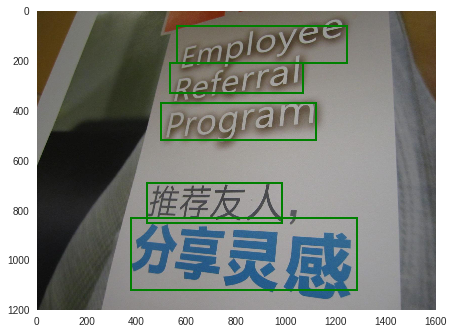

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def show_img(index):
  '''
  Función para mostrar una imagen con la posición de los textos
  que se encuentran en ella.
  '''
   
  x = []
  y = []
  w = []
  h = []
#   t = []
  
  fig,ax = plt.subplots(1)
  ax.imshow(train_X[index])
  
  if len(train_Y[index].shape) == 1:
    x = train_Y[index][2]
    y = train_Y[index][3]
    w = train_Y[index][4]
    h = train_Y[index][5]
#     t = train_Y[index][6]
    
    rect = patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='g',facecolor='none')
    ax.add_patch(rect)
    
  else:
    n_rect = train_Y[index].shape[0]
    for i in range(n_rect):
      x.append(train_Y[index][i][2])
      y.append(train_Y[index][i][3])
      w.append(train_Y[index][i][4])
      h.append(train_Y[index][i][5])
#       t.append(train_Y[index][i][6])
  
    for p in [
      patches.Rectangle(
          (x[p], y[p]),
          w[p],
          h[p],
          linewidth=2,
          edgecolor='g',
          facecolor='none'
      ) for p in range(n_rect)
    ]:
      ax.add_patch(p)  
    
  ax.grid(b=False)
  plt.show()
  
show_img(0)